In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import matplotlib.ticker as plticker
import os.path
import scipy as sc
from math import *

In [2]:
#setup plotter
%matplotlib inline
# matplotlib.verbose.level = 'debug-annoying'
sns.set_theme(style="darkgrid")
sns.set(font_scale=1, rc={'figure.figsize' : (6.4, 4.8), 'text.usetex' : True, 'text.latex.preamble':r'\usepackage{siunitx}','savefig.bbox':'tight'})

In [3]:
Nlevels=4
N=2
rs=4.86
lmax=4
pi=np.pi

rhoB=1/(4/3*np.pi*rs**3)
Rc=(N*3/(4*np.pi*rhoB))**(1/3)

In [4]:
#potentials potentissimi
V_ext=lambda r: 2*np.pi*rhoB*np.where(r>Rc,-2/3*Rc**3/r,1/3*r**2-Rc**2)
V_eff_0=lambda r,l: V_ext(r)+0.5*l*(l+1)/r**2

def U_r(r,h,M,rho):
    u=0
    for i in range(M):
        rp=i*h
        if(rp<r):
            u+=1/r*(rp*rp*rho[i]*h)
        else:
            u+=rp*rho[i]*h
    return 4*pi*u
p=1
A=0.031091
alpha_1=0.21370
beta = [7.5957, 3.5876, 1.6382, 0.49294]
def e_c(rho):
    rs=(1/(4/3*pi*rho))**(1/3)
    DEN = 2 * A * (beta[0] * pow(rs, 0.5) + beta[1] * rs + beta[2] * pow(rs, 3.0 / 2) + beta[3] * pow(rs, p + 1))
    return -2 * A * (1 + alpha_1 * rs) * log(1 + 1.0 / DEN)
def e_x(rho):
    return -3. / 4 * pow(3 * rho / pi, 1. / 3)
def de_c(rho):
	rs = pow(3 / (4 * pi * rho), 1. / 3)
	dr_s = -1. / 3 * pow(3. / 4 / pi, 1. / 3) * pow(rho, -4. / 3)
	arg1 = 2 * A * (beta[0] * pow(rs, 0.5) + beta[1] * rs + beta[2] * pow(rs, 3. / 2) + beta[3] * pow(rs, p + 1))
	arg2 = 1 + 1. / arg1
	return dr_s *(\
		-2*A*alpha_1*rs*log(arg2)\
		-2*A*(1+alpha_1*rs)*1./(arg2)*(-(2*A*\
			(beta[0]*0.5/sqrt(rs)+beta[1]+beta[2]*3./2*sqrt(rs)\
			 +beta[3]*(p+1)*pow(rs,p)))/(arg1*arg1)))
def de_x(rho):
	return -1. / 4 * pow(3. / pi, 1. / 3) * pow(rho, -2. / 3)
V_eff=lambda r,i,rho,M,h,l: \
    V_eff_0(r,l)\
	+ U_r(r,h,M,rho) \
    + e_c(rho[i]) + e_x(rho[i]) \
    + (de_c(rho[i]) + de_x(rho[i]))*rho[i]

# Q1

In [20]:
r=np.linspace(0,60,1000)

plt.figure()
plt.suptitle('Egergies')
for l in range(lmax+1):
    plt.errorbar(x=r,y=V_eff_0(r))
    # plt.errorbar(x=r,y=V_harmonic(r))
plt.axhline(-0.35,label='$l=0 k=0$')
plt.axvline(Rc,color='red')
plt.axvline(rs,color='green')
plt.ylim([-0.6,2])

(-0.6, 2.0)

## Self consistent plots

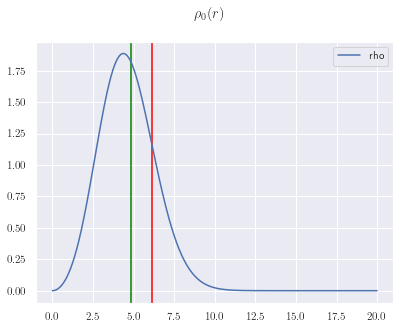

In [5]:
# plot rho
names=['r','rho']
df_0 = pd.read_csv("data/numerov.dat",sep='\s+',skiprows=1,names=names)

l=0
plt.figure()
plt.suptitle(r'$\rho_0(r)$')
plt.axvline(Rc,color='red')
plt.axvline(rs,color='green')
plt.plot(df_0['r'],df_0['rho'],label='rho')
plt.legend()
# plt.ylim([-0.1,10])

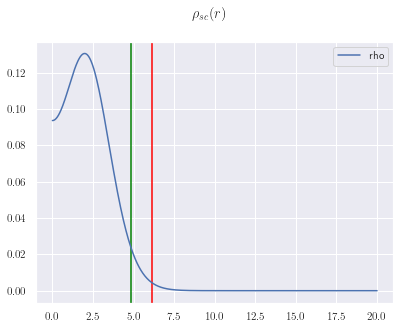

In [88]:
# plot rho
names=['r','rho','V_0','V_c','V_x','U_R','V_Ext']
df_sc = pd.read_csv("data/numerov_sc.dat",sep='\s+',skiprows=1,names=names)

l=0
plt.figure()
plt.suptitle(r'$\rho_{sc}(r)$')
plt.axvline(Rc,color='red')
plt.axvline(rs,color='green')
plt.plot(df_sc['r'],df_sc['rho'],label='rho')
# plt.plot(df_sc['r'],df_sc['V_l'],label='V_nol')
plt.legend()
# plt.ylim([-0,1e-100])

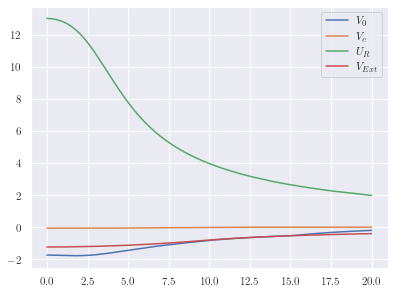

In [90]:
plt.figure()
lmax = 0
# V_sc=np.empty_like(df_sc['r'])
# h=df_sc['r'][1]-df_sc['r'][0]
# for m in range(V_sc.size):
#     V_sc[m]=V_eff(df_sc['r'][m],m,df_sc['rho'],V_sc.size,h,l)
# V_0=np.empty_like(df_0['r'])
# for m in range(V_0.size):
#     V_0[m]=V_eff_0(df_0['r'][m],l)
# for l in range(lmax+1):
#     V_sc = df_sc['V_l'] + 0.5 * l * (l+1)/df_sc['r']**2
plt.plot(df_sc['r'],df_sc['V_0'],label='$V_0$')
plt.plot(df_sc['r'],df_sc['V_c'],label='$V_c$')
plt.plot(df_sc['r'],df_sc['U_R'],label='$U_R$')
plt.plot(df_sc['r'],df_sc['V_Ext'],label=r'$V_{Ext}$')
# plt.suptitle(r'$V_{eff}(r)$ comparison')
# plt.axvline(Rc,color='red')
# plt.axvline(rs,color='green')
# plt.plot(df_0['r'],V_0,label=r'$V_{0}$')
plt.legend()
# plt.ylim([-1.5,4.5])

In [87]:
df_sc['V_c']

0       -0.034333
1       -0.034333
2       -0.034333
3       -0.034333
4       -0.034333
           ...   
29995   -0.001132
29996   -0.000949
29997   -0.000738
29998   -0.000478
29999   -0.000002
Name: V_c, Length: 30000, dtype: float64

## Boh

In [35]:
def q(k):
    for l in range(0,k):
        yield 'phi{}'.format(l)
        yield 'rho{}'.format(l)
names=['r']+list(q(Nlevels))
df = pd.read_csv("data/numerov.dat",sep='\s+',skiprows=1,names=names)

r=np.linspace(0,30,1000)

l=0
plt.figure()
plt.suptitle('Egergies')
# plt.errorbar(x=r,y=V_eff(r))
# plt.axhline(0.224,label='$l=0 k=0$')
# plt.axhline(0.368,label='$l=1 k=0$')
# plt.axhline(0.508,label='$l=2 k=0$')
# plt.axhline(0.501,label='$l=0 k=1$')
plt.axvline(Rc,color='red')
plt.axvline(rs,color='green')
for i in range(Nlevels):
    plt.plot(df['r'],df['rho{}'.format(i)],label='{}'.format(i))
plt.legend()
# plt.ylim([0,3])

No handles with labels found to put in legend.


(-1000.0, 1000.0)

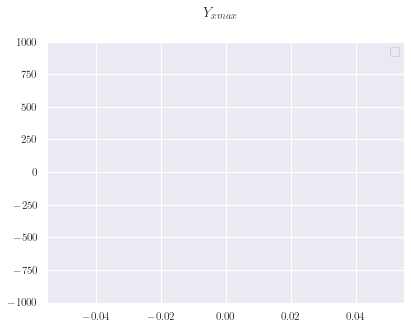

In [26]:
names=['E','Y_xmax']
df = pd.read_csv("data/y_max.dat",sep='\s+',skiprows=1,names=names)

plt.figure()
plt.suptitle('$Y_{xmax}$')
plt.errorbar(x=df['E'],y=df['Y_xmax'],marker='o')
plt.legend()
plt.ylim([-1e3,1e3])

No handles with labels found to put in legend.


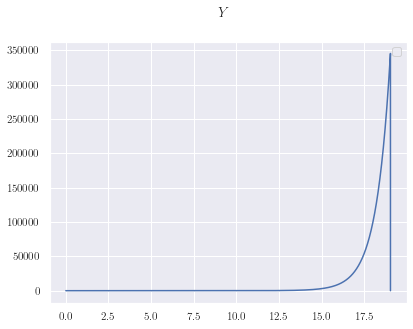

In [43]:
names=['r','Y','V']
df = pd.read_csv("data/numerov_sc_y.dat",sep='\s+',skiprows=1,names=names)

plt.figure()
plt.suptitle('$Y$')
plt.errorbar(x=df['r'],y=df['Y'])
plt.legend()
# plt.ylim([-1e3,1e3])

No handles with labels found to put in legend.


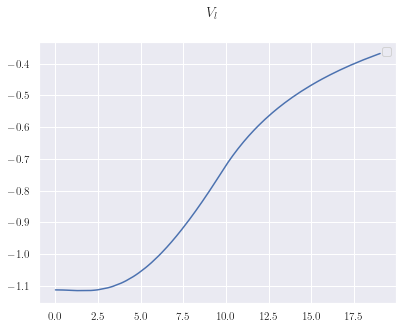

In [44]:
plt.figure()
plt.suptitle('$V_l$')
plt.errorbar(x=df['r'],y=df['V'])
plt.legend()
# plt.ylim([-1e3,1e3])

In [46]:
df['V']

0       -1.11304
1       -1.11304
2       -1.11304
3       -1.11304
4       -1.11304
          ...   
29995       -inf
29996       -inf
29997       -inf
29998       -inf
29999       -inf
Name: V, Length: 30000, dtype: float64